#  «Анализ данных об оптовых продажах аудиотехники»

**В ходе работы над проектом будут использованы следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

### Соберем датасет с заказами по папкам

In [2]:
#импортируем сюда библиотеки для работы с этим проектом
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#создаем путь к папке data
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data'

In [4]:
#список нужных файлов
target_files = ['orders.csv', 'order_status.csv', 'products.csv']

In [5]:
#пустой список куда надо сохранять пути к файлам
data_files = []

In [6]:
# перебор всех файлов и папок в директории way
for path, dirs, files in os.walk(way):
    for file in files:
        # если файл в списке target_files
        if file in target_files:
            # добавляем полный путь к файлу в список data_files
            file_path = os.path.join(path, file)
            data_files.append(file_path)
print(data_files)

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv', '/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/shared//homeworks/python_ds_miniprojects/final_project/data/products/С

In [7]:
#создаем пустые списки чтоб вложить в них датафреймы
orders_df_list = []
order_status_df_list = []
products_df_list = []

In [8]:
# цикл по каждому пути в списке data_files
for file_path in data_files:
    # если в пути есть 'orders.csv'
    if 'orders.csv' in file_path:
         # читаем csv в датафрейм
        df = pd.read_csv(file_path)
        # извлекаем менеджера и дату из пути
        path_parts = file_path.split('/')
        manager = path_parts[-2]
        date = path_parts[-3]
        # добавляем колонки manager и date
        df['manager']=manager
        df['date']=date
        # добавляем датафрейм в список
        orders_df_list.append(df)
    elif 'order_status.csv' in file_path:
        df = pd.read_csv(file_path)
        order_status_df_list.append(df)
    elif 'products.csv' in file_path:
        df = pd.read_csv(file_path)
        path_parts = file_path.split('/')
        category = path_parts[-2]
        df['category'] = category
        products_df_list.append(df)
# собираем полные датафреймы, объединяя все датафреймы из списков        
df_orders = pd.concat(orders_df_list, ignore_index=True)
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_products = pd.concat(products_df_list, ignore_index=True)
#df_orders.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/df_orders.csv', index=False)
#df_order_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/df_order_status.csv', index=False)
df_products.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/df_products.csv', index=False)
print(df_orders.shape)
print(df_order_status.shape)
print(df_products.shape)

(4603, 5)
(346, 3)
(1677, 4)


In [9]:
df_orders.head()

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603 entries, 0 to 4602
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    4603 non-null   object
 1   product_id  4603 non-null   int64 
 2   quantity    4603 non-null   int64 
 3   manager     4603 non-null   object
 4   date        4603 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.9+ KB


In [11]:
df_order_status.head()

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled


In [12]:
df_order_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   order_id   346 non-null    object
 1   client_id  346 non-null    int64 
 2   status     346 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [13]:
df_products.head()

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер


In [14]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1677 non-null   int64  
 1   name      1677 non-null   object 
 2   price     1677 non-null   float64
 3   category  1677 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.5+ KB


### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

Посчитаем количество заказов в каждый день. **Определим день с наибольшим числом заказов.**

In [15]:
#переводим колнку даты из object в datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])
# группируем по дате сохраняя индекс, находим уникальное число заказов и сортируем по убыванию число заказов
# и переименновываем колонку
orders_by_date = df_orders.groupby('date',as_index=False) \
         .order_id.nunique() \
         .sort_values('order_id', ascending=False) \
         .rename(columns={'order_id':'orders'}) 
orders_by_date         
         
         
         

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


**Построим график с количеством заказов по дням и определим, заметна ли в данных сезонность.**

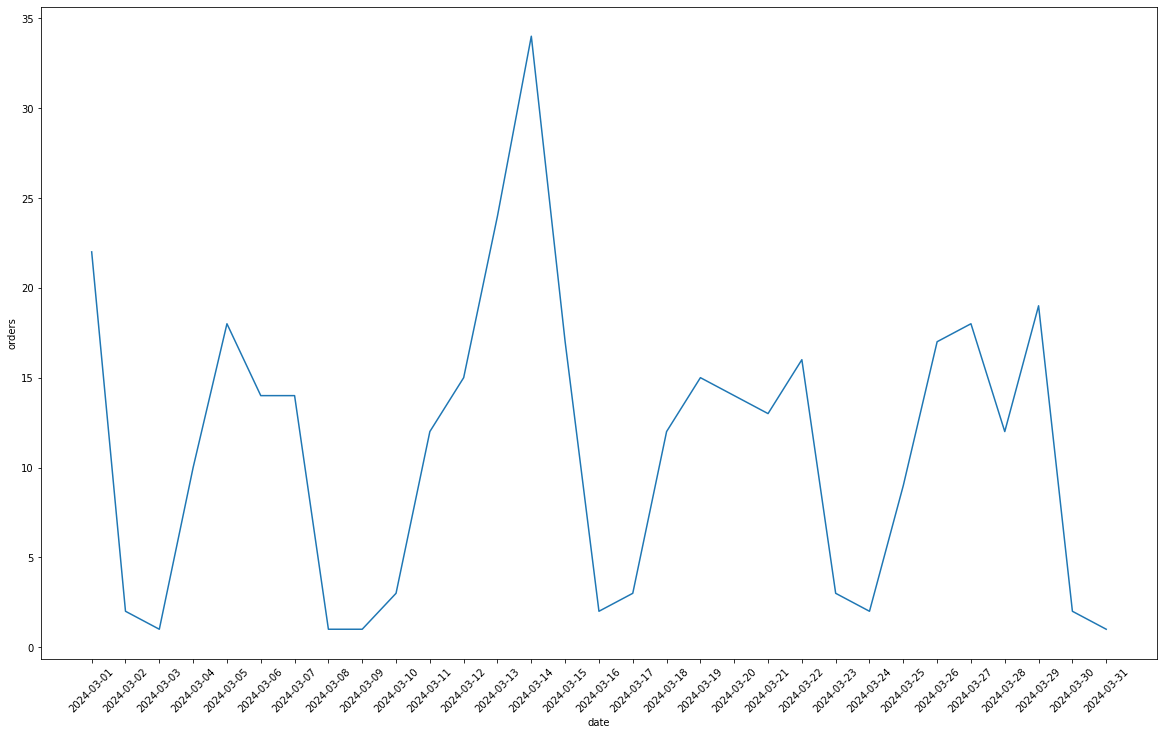

In [18]:
#устанавливаем размер графика
plt.figure(figsize=(20, 12))

#строим график
sns.lineplot(x='date', y='orders', data=orders_by_date)
#устанавливаем угол поворота подписей под 45 градусов
plt.xticks(orders_by_date['date'], rotation=45)
plt.show()

In [19]:
#соединяем два датафрейма по order_id
orders_status = df_orders.merge(df_order_status, on='order_id')


In [20]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [21]:
#сохраняем файл
orders_status.to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-sergej-pastuhov-wg-8c0c7/orders_status.csv', index=False)

Посмотрим на количество и соотношение подтвержденных и отмененных заказов.

In [22]:
#выбираем колонки статус и заказ и удаляем дубликаты
order_and_status = orders_status[['order_id', 'status']]
order_and_status = order_and_status.drop_duplicates(['order_id', 'status'])
#отбираем только подтвержденные заказы
confirmed = order_and_status.query('status == "confirmed"').order_id.nunique()
#отбираем только отменные заказы
canceled = order_and_status.query('status == "canceled"').order_id.nunique()
#считаем долю
confirmed_part = round(confirmed/(confirmed+canceled),2)
canceled_part =  round(canceled/(confirmed+canceled),2)

In [23]:
confirmed_part

0.89

In [24]:
canceled_part

0.11

In [25]:
order_and_status

,order_id,status
0,QPLK-54839036,confirmed
8,MAQJ-95867467,canceled
20,KHLF-51759445,confirmed
35,DALF-47566548,confirmed
55,BZHU-92977894,canceled
...,...,...
4539,SOCT-63427141,confirmed
4558,HLDH-41146746,confirmed
4571,IZFC-94335845,confirmed
4580,CUDB-19668701,confirmed


**Посчитаем количество подтвержденных и отмененных заказов на каждую дату.** Определим, в какой день не было ни одного подтвержденного заказа. Для этого сделаем сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполним нулями.  


In [26]:
pivot_orders = orders_status.groupby(['date', 'status'], as_index=False)\
.order_id.nunique()\
.rename(columns={'order_id':'orders'})\
.pivot(index='date', columns='status', values='orders')\
.fillna(0)
pivot_orders = pivot_orders[['canceled','confirmed']] = pivot_orders[['canceled','confirmed']].astype(int)
pivot_orders.query('confirmed == 0')

status,canceled,confirmed
date,,
2024-03-09,1,0


In [27]:
pivot_orders

status,canceled,confirmed
date,,
2024-03-01,2,20
2024-03-02,0,2
2024-03-03,0,1
2024-03-04,0,10
2024-03-05,0,18
2024-03-06,1,13
2024-03-07,1,13
2024-03-08,0,1
2024-03-09,1,0


**Построим график с заказами по дням в разбивке по статусу заказа.** 

In [28]:
for_plot = orders_status.groupby(['date', 'status'], as_index=False).order_id.nunique()

for_plot


,date,status,order_id
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10
5,2024-03-05,confirmed,18
6,2024-03-06,canceled,1
7,2024-03-06,confirmed,13
8,2024-03-07,canceled,1
9,2024-03-07,confirmed,13


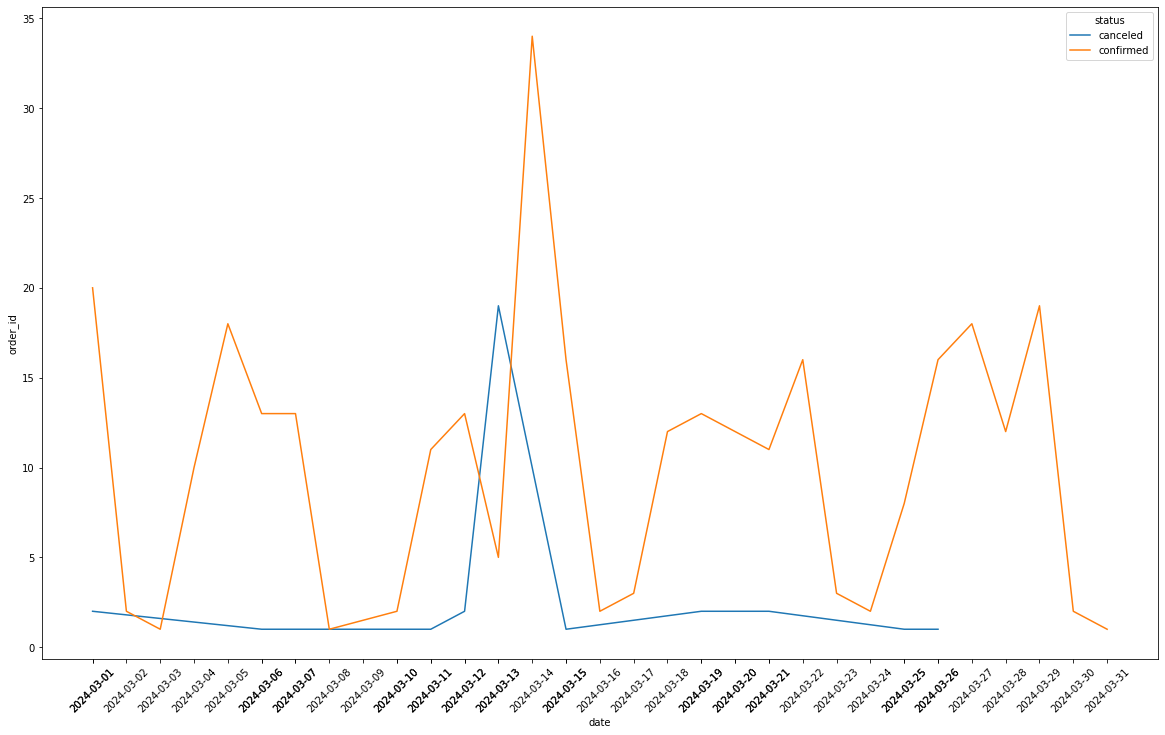

In [30]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=for_plot, x='date', y='order_id', hue='status')
plt.xticks(for_plot['date'], rotation=45)
plt.show()

In [31]:
orders_status.head()

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed


In [32]:
#выгрузка по отменным заказам 13 числа
canceled_13 = orders_status.query('status=="canceled" and date=="2024-03-13"').groupby('order_id',as_index=False).agg({'product_id':'nunique', 'quantity':'sum','manager':'max','client_id':'max'})
canceled_13

,order_id,product_id,quantity,manager,client_id
0,AFIH-00611801,11,192,Алексей Саксофонов,43
1,BBFJ-27674101,14,294,Ксения Балалайкина,73
2,CLBQ-63032648,13,205,Виктор Тромбонов,60
3,CYJY-07359557,13,316,Екатерина Тарелкина,56
4,GHGB-88045656,4,42,Ксения Балалайкина,7
5,JEIF-69283221,15,207,Виктор Тромбонов,94
6,JQQO-28609300,15,252,Виктор Тромбонов,93
7,KJJS-03491897,18,399,Алексей Саксофонов,66
8,MIGZ-68487439,17,325,Алексей Саксофонов,51
9,NBIO-35476164,14,319,Виктор Тромбонов,95


In [33]:
#выгрузка по оформленным заказам 14 числа
confirmed_14 = orders_status.query('status=="confirmed" and date=="2024-03-14"').groupby('order_id',as_index=False).agg({'product_id':'nunique', 'quantity':'sum','manager':'max','client_id':'max'})
confirmed_14

,order_id,product_id,quantity,manager,client_id
0,ACXS-56511429,8,177,Алексей Саксофонов,24
1,AUZX-12706022,19,369,Екатерина Тарелкина,83
2,BCMM-97072924,17,325,Алексей Саксофонов,51
3,BGHE-44722549,8,149,Виктор Тромбонов,95
4,DMEB-71700015,12,190,Сергей Контрабасов,93
5,DOJS-07233317,16,277,Маргарита Камертонова,56
6,EJHJ-34261015,20,319,Максим Барабанов,87
7,EPBF-14743479,15,207,Виктор Тромбонов,94
8,EZAA-08394172,9,176,Анастасия Дудкина,39
9,FDEB-71487438,11,192,Алексей Саксофонов,43


In [34]:
#нахождение общих позиций
general_13_14 = confirmed_14.merge(canceled_13, on=['manager','client_id','quantity','product_id'])

In [35]:
general_13_14

,order_id_x,product_id,quantity,manager,client_id,order_id_y
0,AUZX-12706022,19,369,Екатерина Тарелкина,83,RSBH-94158604
1,BCMM-97072924,17,325,Алексей Саксофонов,51,MIGZ-68487439
2,EPBF-14743479,15,207,Виктор Тромбонов,94,JEIF-69283221
3,FDEB-71487438,11,192,Алексей Саксофонов,43,AFIH-00611801
4,FTPV-77865209,16,283,Маргарита Камертонова,26,UUZR-48309816
5,GRCH-73394464,18,399,Алексей Саксофонов,66,KJJS-03491897
6,GYTK-45256974,12,260,Ксения Балалайкина,75,NLSJ-24436750
7,HMXC-87726636,14,262,Маргарита Камертонова,68,QYZK-30462944
8,IECD-18739530,13,205,Виктор Тромбонов,60,CLBQ-63032648
9,IMND-92004620,10,188,Владимир Ударников,38,NENO-68279828


In [36]:
#доля
part_orders = len(general_13_14)/len(confirmed_14)
part_orders

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

**Откроем файл `usd_rate.txt`, соберем из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитаем среднее значение курса доллара за месяц.**

In [37]:
#открытие и прочтение файла
with open('usd_rate.txt') as f:
    currency = [line.strip() for line in f.readlines()]
currency

['2024-03-01,90.8423,Доллар США',
 '2024-03-02,91.3336,Доллар США',
 '2024-03-03,91.3336,Доллар США',
 '2024-03-04,91.3336,Доллар США',
 '2024-03-05,91.3534,Доллар США',
 '2024-03-06,91.1604,Доллар США',
 '2024-03-07,90.3412,Доллар США',
 '2024-03-08,90.7493,Доллар США',
 '2024-03-09,90.7493,Доллар США',
 '2024-03-10,90.7493,Доллар США',
 '2024-03-11,90.7493,Доллар США',
 '2024-03-12,90.6252,Доллар США',
 '2024-03-13,90.8818,Доллар США',
 '2024-03-14,91.5449,Доллар США',
 '2024-03-15,91.6359,Доллар США',
 '2024-03-16,91.87,Доллар США',
 '2024-03-17,91.87,Доллар США',
 '2024-03-18,91.87,Доллар США',
 '2024-03-19,91.9829,Доллар США',
 '2024-03-20,92.2243,Доллар США',
 '2024-03-21,92.6861,Доллар США',
 '2024-03-22,91.9499,Доллар США',
 '2024-03-23,92.6118,Доллар США',
 '2024-03-24,92.6118,Доллар США',
 '2024-03-25,92.6118,Доллар США',
 '2024-03-26,92.7761,Доллар США',
 '2024-03-27,92.5745,Доллар США',
 '2024-03-28,92.5919,Доллар США',
 '2024-03-29,92.2628,Доллар США',
 '2024-03-30,92.366,

In [38]:
#создание датафрейма
df = pd.DataFrame(currency, columns=['col_name'])
df

,col_name
0,"2024-03-01,90.8423,Доллар США"
1,"2024-03-02,91.3336,Доллар США"
2,"2024-03-03,91.3336,Доллар США"
3,"2024-03-04,91.3336,Доллар США"
4,"2024-03-05,91.3534,Доллар США"
5,"2024-03-06,91.1604,Доллар США"
6,"2024-03-07,90.3412,Доллар США"
7,"2024-03-08,90.7493,Доллар США"
8,"2024-03-09,90.7493,Доллар США"
9,"2024-03-10,90.7493,Доллар США"


In [39]:
#создание 3 колонок, сплит через",", перевод date в дату из object и выделение двух основных колонок
df[['date', 'currency_rate', 'currency']]=df['col_name'].str.split(',', expand=True)
df['date']=pd.to_datetime(df['date'])
df['currency_rate']=pd.to_numeric(df['currency_rate'])
df_currency=df[['date','currency_rate']]
df_currency.dtypes

date             datetime64[ns]
currency_rate           float64
dtype: object

In [40]:
df_currency.head()

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534


In [41]:
#средний курс за месяц и округление до двух знаков
mean_rate = round(df_currency.currency_rate.mean(),2)
mean_rate

91.7

**Чему равна общая выручка в рублях?** 

In [42]:
#объединение двух датафреймов по разным ключам
df_full = orders_status.merge(df_products, left_on='product_id', right_on='id')
df_full['date']=pd.to_datetime(df_full['date'])
df_full.dtypes

order_id              object
product_id             int64
quantity               int64
manager               object
date          datetime64[ns]
client_id              int64
status                object
id                     int64
name                  object
price                float64
category              object
dtype: object

In [43]:
#добвыление колонки с курсом
df_full = df_full.merge(df_currency, on='date')
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493


In [44]:
#вычисление цены в рублях
df_full['price_rub'] = df_full['price']*df_full['currency_rate']
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864


In [45]:
#вычисление выручки
df_full['revenue'] = df_full['price_rub']*df_full['quantity']
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [46]:
#только подтвержденные заказы
df_confirmed = df_full.query('status=="confirmed"')
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [47]:
#сумма выручки за месяц
round(df_confirmed.revenue.sum(),2)

2038231821.56

**Следующая метрика — средний чек в этом месяце (в рублях).** 

In [48]:
#число уникальных подтвержденных заказов
unique_orders = df_confirmed.order_id.nunique()
unique_orders

309

In [49]:
#средний чек
avg_check = df_confirmed.revenue.sum()/unique_orders
avg_check

6596219.487264932

In [50]:
round(avg_check,2)

6596219.49

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [51]:
df_report_by_date = df_confirmed.groupby('date', as_index=False).agg({'order_id':'nunique','revenue':'sum'}).rename(columns={'order_id':'orders'})

In [52]:
df_report_by_date.head()

,date,orders,revenue
0,2024-03-01,20,1.554118e+08
1,2024-03-02,2,1.197167e+07
2,2024-03-03,1,2.548418e+06
3,2024-03-04,10,6.404993e+07
4,2024-03-05,18,8.952724e+07


In [53]:
df_report_by_date['avg_check']=round(df_report_by_date['revenue']/df_report_by_date['orders'],2)
df_report_by_date.head()

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46


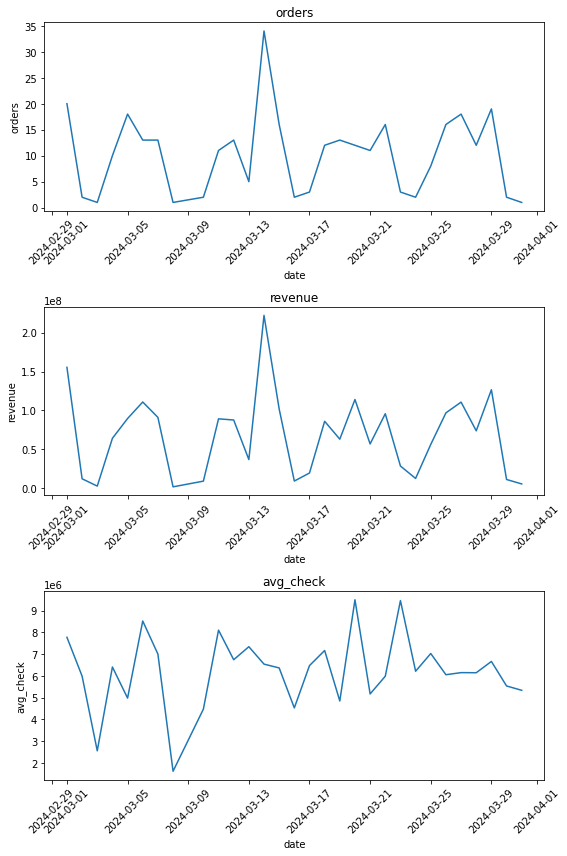

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12)) 

sns.lineplot(x='date', y='orders', data=df_report_by_date, ax=axes[0])
axes[0].set_title('orders')
axes[0].tick_params(axis='x', rotation=45)
sns.lineplot(x='date', y='revenue', data=df_report_by_date, ax=axes[1])
axes[1].set_title('revenue')
axes[1].tick_params(axis='x', rotation=45)
sns.lineplot(x='date', y='avg_check', data=df_report_by_date, ax=axes[2])
axes[2].set_title('avg_check')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()


### Проанализируем интерес клиентов к брендам

**Посчитаем, сколькими брендами интересовались клиенты** 

In [55]:
df_full['brand'] = df_full['name'].str.split(',').str[0]
df_full.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05,JBL
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06,KEF
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04,Heco
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04,Rode


In [56]:
df_full.brand.nunique()

121

Посчитаем, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определим, какой бренд принес наибольшую выручку.** 

In [57]:
df_full.query('status =="confirmed"')\
        .groupby('brand', as_index=False)\
        .agg({'revenue':'sum','order_id':'nunique'})\
        .sort_values(['revenue','order_id'], ascending=[False, False])


,brand,revenue,order_id
46,JBL,2.665961e+08,264
43,Heco,2.388163e+08,229
53,Klipsch,2.039024e+08,205
120,Yamaha,1.658651e+08,218
49,KEF,1.465101e+08,73
...,...,...,...
8,AudioSource,3.388167e+04,1
40,Fosi Audio,3.129419e+04,1
1,ART,2.670040e+04,2
18,Bravo Audio,2.405086e+04,1


 **Определим, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

In [58]:
products_in_orders = df_confirmed['product_id'].unique().tolist()
products_in_orders

[489,
 594,
 670,
 469,
 1302,
 1309,
 134,
 1659,
 383,
 640,
 1484,
 225,
 1325,
 504,
 513,
 998,
 75,
 707,
 763,
 617,
 1023,
 1189,
 1315,
 1354,
 1367,
 39,
 630,
 452,
 519,
 1637,
 793,
 787,
 1186,
 722,
 643,
 870,
 799,
 550,
 464,
 123,
 778,
 1550,
 11,
 496,
 501,
 665,
 563,
 807,
 484,
 1238,
 517,
 1099,
 625,
 1592,
 628,
 895,
 494,
 614,
 755,
 1364,
 382,
 1591,
 1497,
 1626,
 1247,
 499,
 27,
 1485,
 924,
 578,
 1196,
 575,
 372,
 1271,
 1445,
 669,
 1458,
 1548,
 523,
 1523,
 1382,
 990,
 903,
 1237,
 1263,
 981,
 634,
 1654,
 1652,
 1649,
 64,
 315,
 1607,
 1525,
 1285,
 1621,
 1465,
 791,
 1300,
 422,
 1188,
 642,
 1187,
 649,
 498,
 827,
 228,
 510,
 595,
 38,
 236,
 816,
 1655,
 875,
 307,
 714,
 276,
 579,
 602,
 820,
 1190,
 1001,
 1319,
 798,
 777,
 1264,
 1068,
 525,
 522,
 60,
 865,
 776,
 1469,
 759,
 1416,
 1636,
 477,
 974,
 876,
 988,
 107,
 1276,
 320,
 1373,
 819,
 668,
 23,
 432,
 1213,
 1612,
 1071,
 542,
 79,
 1362,
 977,
 1534,
 197,
 229,
 99

In [59]:
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')
df_products.shape

(1677, 5)

In [60]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

In [61]:
df_products

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,yes


**Определим, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.**

In [62]:
df_products['brand'] = df_products['name'].str.split(',').str[0]
pivot_table = df_products.groupby(['brand','is_in_orders'], as_index=False)\
            .agg({'id':'nunique'})\
            .rename(columns={'id':'products'})\
            .pivot(index='brand', columns='is_in_orders', values='products')\
            .fillna(0)\
            .reset_index()\
            
            


In [63]:
pivot_table['total_products'] = pivot_table['yes']+pivot_table['no']
pivot_table['part'] = pivot_table['no']/pivot_table['total_products']
pivot_table.query('total_products > 15 and part > 0.5')

is_in_orders,brand,no,yes,total_products,part
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


### Составим отчет по продажам менеджеров

In [64]:
df_confirmed.head()

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04


In [65]:
managers = df_confirmed.groupby('manager', as_index=False)\
            .agg({'revenue':'sum','order_id':'nunique'})\
            .rename(columns={'order_id':'orders'})\
            .sort_values('revenue', ascending=False)
managers.head()


,manager,revenue,orders
9,Маргарита Камертонова,3.473886e+08,48
4,Виктор Тромбонов,3.188999e+08,50
8,Максим Барабанов,2.401478e+08,40
5,Владимир Ударников,2.084865e+08,31
0,Алексей Саксофонов,1.953435e+08,27


In [66]:
managers['part_revenue'] = round(managers['revenue']/managers['revenue'].sum()*100,2)
managers

,manager,revenue,orders,part_revenue
9,Маргарита Камертонова,3.473886e+08,48,17.04
4,Виктор Тромбонов,3.188999e+08,50,15.65
8,Максим Барабанов,2.401478e+08,40,11.78
5,Владимир Ударников,2.084865e+08,31,10.23
0,Алексей Саксофонов,1.953435e+08,27,9.58
7,Ксения Балалайкина,1.817621e+08,27,8.92
6,Екатерина Тарелкина,1.781576e+08,28,8.74
10,Надежда Гармошкина,1.347836e+08,21,6.61
1,Анастасия Дудкина,1.234504e+08,20,6.06
2,Антон Скрипкин,5.150268e+07,7,2.53


In [67]:
managers['part_orders'] = round(managers['orders']/managers['orders'].sum()*100,2)
managers

,manager,revenue,orders,part_revenue,part_orders
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
10,Надежда Гармошкина,1.347836e+08,21,6.61,6.80
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27


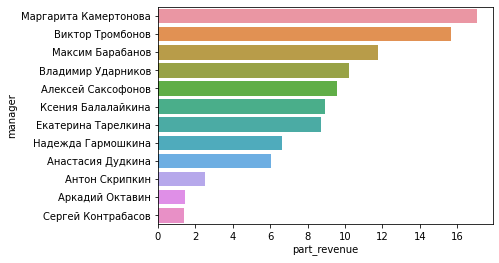

In [68]:
sns.barplot(data=managers, x ='part_revenue', y='manager' )
plt.show()

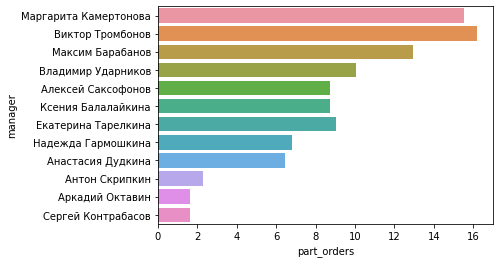

In [69]:
sns.barplot(data=managers, x ='part_orders', y='manager' )
plt.show()

## Итоги

Мы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке».